In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline  

In [20]:
def fileopen(filenames):
    nb_lines = 64
    batch = np.zeros((len(filenames),nb_lines))
    test = np.zeros((len(filenames),nb_lines))
    train = np.zeros((len(filenames),nb_lines))
    for idx,files in enumerate(filenames):
        with open(files,'rb') as f:
            epoch = -1
            for lines in f:
                nb_line = int(lines.split()[0])
                batch[idx][nb_line] = nb_line
                test[idx][nb_line] = float(lines.split()[1])
                train[idx][nb_line] = float(lines.split()[2])
        
    return batch, train, test
        

In [46]:
import matplotlib.cm as cm
def myplot(data,title):
    line_width = 1.0
    plt.figure(figsize=(15, 7), dpi=300)
    plt.ylim(0.7,1)
    plt.xlim(-0.5, 30)
    plt.xticks(np.arange(0,30, 1))
    plt.yticks(np.arange(0.7, 1, 0.025))
    plt.ylabel('AUC')
    plt.xlabel('epoch')
    [batch, train, test] = data
#     cmap = plt.get_cmap('gnuplot')
#     colors = [cmap[i] for i in np.linspace(0,1,len(batch))]
    for idx in range(len(batch)):
        label = filename[idx].split('/')[1]
        #plt.plot(batch[idx], train[idx], color=colors[idx], linewidth=line_width,label =label)
        #plt.plot(batch[idx], train[idx],'k.')
        plt.plot(batch[idx], test[idx], linewidth=line_width,label=label)
        plt.plot(batch[idx], test[idx],'k.')
    plt.legend(bbox_to_anchor=(1.13, 1),fancybox=True,frameon=True)
    plt.title(title,fontsize=20)
    title = "activation_lr_iterations/" + title + '.png'
    plt.savefig(title)
    #plt.show()

In [43]:
filename = ["matmult/0.001_relu_tanh"]
data = fileopen(filename)
myplot(data, 'ABC')

IOError: [Errno 2] No such file or directory: 'matmult/0.001_relu_tanh'

IndexError: list index out of range

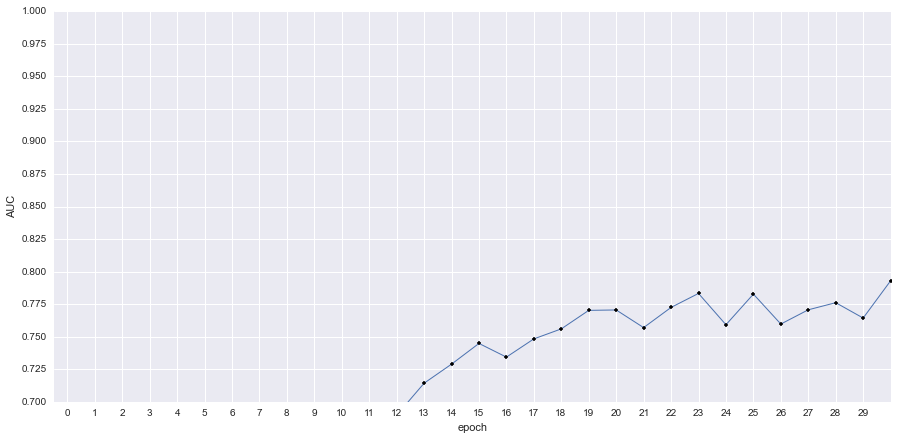

In [47]:
from os import listdir
from os.path import isfile, join
extensions = ('.png', '.jpg')
mypath = "matmult/"
onlyfiles = [ mypath+f for f in listdir(mypath) if isfile(join(mypath,f)) ]
for currentFile in onlyfiles:
    if any(currentFile.endswith(ext) for ext in extensions):
        os.remove(currentFile)
        onlyfiles.remove(currentFile)

data = fileopen(onlyfiles)
myplot(data,'alleles')

In [ ]:
print onlyfiles
for i in range(1,2):
    filename = onlyfiles[(i-1)*5:i*5]
    title = '_'.join(filename[1].split('/')[1].split('_')[:2])
    print title
    data = fileopen(filename)
    myplot(data, title)



In [ ]:
for name in onlyfiles:
    with open(name) as f:
        max_AUC=0
        for lines in f:
            max_AUC = max(max_AUC, lines.split()[1])
        final_AUC = lines.split()[1]    
        print name, "\t\t", max_AUC, "\t", final_AUC

In [ ]:
import os
mypath = "activation_lr_iterations/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath,f)) ]
for name in onlyfiles:
    new_name = name.split("_")
    myorder = [2,0,1]
    print new_name
    new_name = '_'.join([new_name[i] for i in myorder])
    os.rename(mypath+name,new_name)

In [ ]:
with open('activation_lr_iterations/sort') as f:
    counter = 0
    filename = []
    for lines in f: 
        if(counter%31 == 0):
            name = '_'.join(lines.split())
            filename = 'activation_lr_iterations/' + name
            print filename
        else:
            print filename
            with open(filename, 'ab') as w:
                w.write(str(lines))
        counter+=1